In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Processed/costs.csv")

In [3]:
df.columns = ['Spec', "CostValues"]

In [4]:
df.head()

,Spec,CostValues
0,"ZZFeatureMap(4, reps=1) SPSA(max_trials=50) vd...","[0.2748617798553483, 0.29221917984902623, 0.29..."
1,"ZZFeatureMap(4, reps=1) ADAM(maxiter=50) vdepth 1","[0.2800250430041522, 0.2800250430077578, 0.280..."
2,"ZZFeatureMap(4, reps=1) COBYLA(maxiter=50) vde...","[0.22300984848722544, 0.23405490574343124, 0.2..."
3,"ZZFeatureMap(4, reps=1) SPSA(max_trials=50) vd...","[0.23363865311913723, 0.21678226243331394, 0.2..."
4,"ZZFeatureMap(4, reps=1) ADAM(maxiter=50) vdepth 3","[0.22300984848722544, 0.22300984848704483, 0.2..."


In [5]:
def check_lowest_cost():
    """
    Checks the configs which attained the lowest sost
    """
    lowest_cost = []
    for i in range(df.shape[0]):
        data = [float(x.replace("[", "").replace("]", "")) for x in df['CostValues'][i].split(',')]
        lowest_cost.append(data[len(data) - 1])
        
    lowest_cost = sorted(lowest_cost)[:10]
    for m in lowest_cost:
        for i in range(df.shape[0]):
            data = df['CostValues'][i].split(',')
            data = [float(x.replace("[", "").replace("]", "")) for x in data]
            if float(m) == float(data[len(data) - 1]):
                print("{} : Cost: {}".format(df["Spec"][i], data[len(data) - 1]))

In [6]:
check_lowest_cost()

ZFeatureMap(4, reps=2) SPSA(max_trials=50) vdepth 5 : Cost: 0.13492279429495616
ZFeatureMap(4, reps=2) SPSA(max_trials=50) vdepth 3 : Cost: 0.13842958846394343
ZFeatureMap(4, reps=2) COBYLA(maxiter=50) vdepth 3 : Cost: 0.14097642258192988
ZFeatureMap(4, reps=2) SPSA(max_trials=50) vdepth 1 : Cost: 0.14262128997684975
ZFeatureMap(4, reps=1) COBYLA(maxiter=50) vdepth 1 : Cost: 0.1430145495411656
ZZFeatureMap(4, reps=1) SPSA(max_trials=50) vdepth 5 : Cost: 0.14359757088670677
ZFeatureMap(4, reps=2) COBYLA(maxiter=50) vdepth 5 : Cost: 0.1460568741051525
ZFeatureMap(4, reps=1) SPSA(max_trials=50) vdepth 3 : Cost: 0.14830080135566964
ZFeatureMap(4, reps=1) SPSA(max_trials=50) vdepth 5 : Cost: 0.14946706294763648
ZFeatureMap(4, reps=1) COBYLA(maxiter=50) vdepth 3 : Cost: 0.15447151389989414


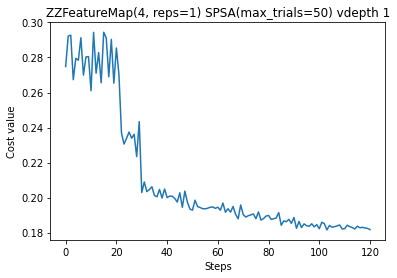

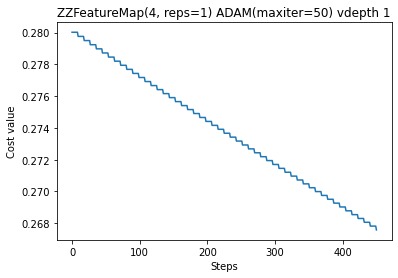

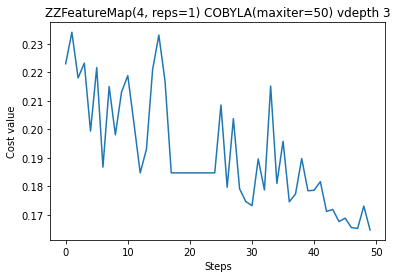

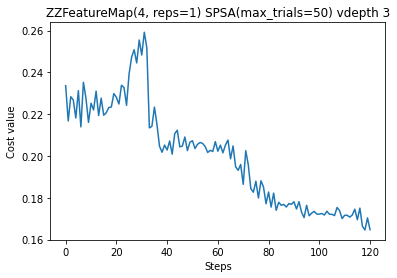

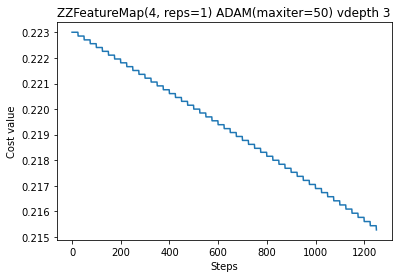

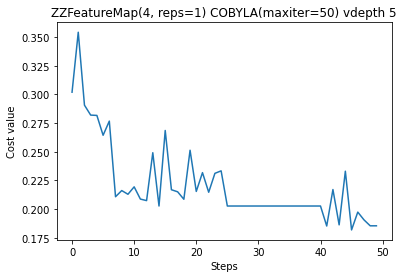

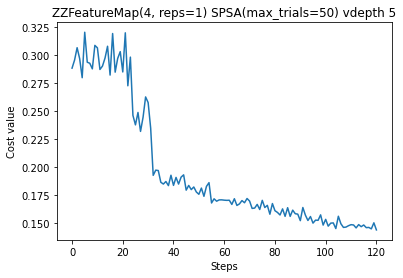

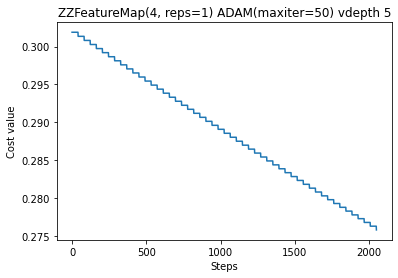

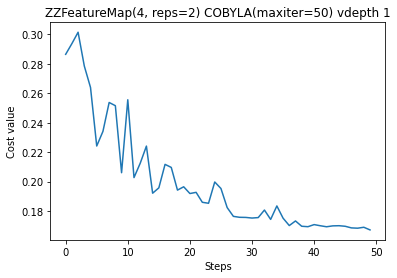

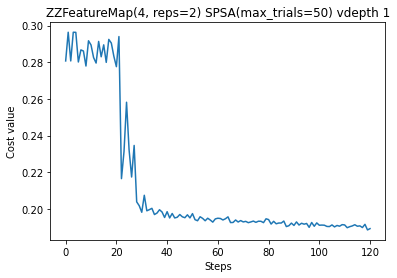

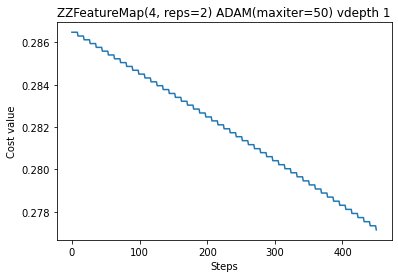

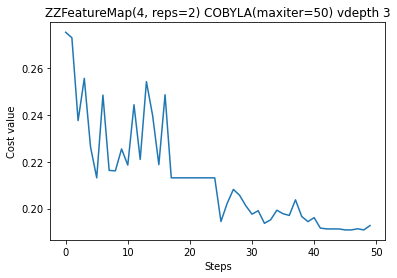

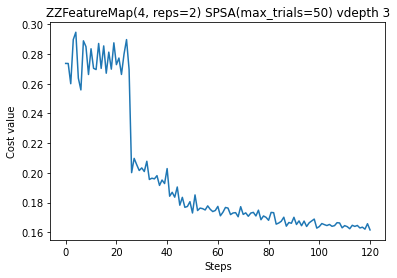

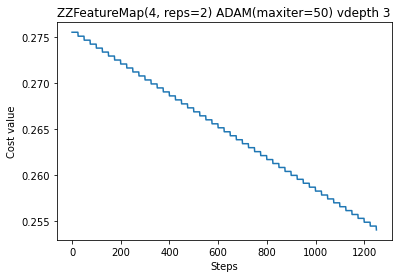

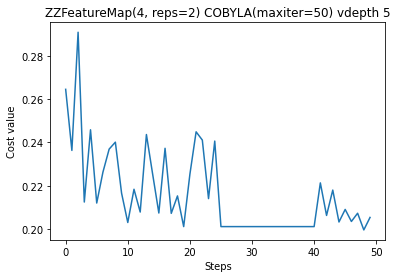

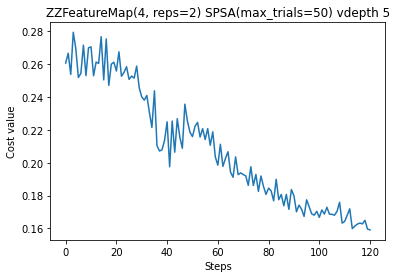

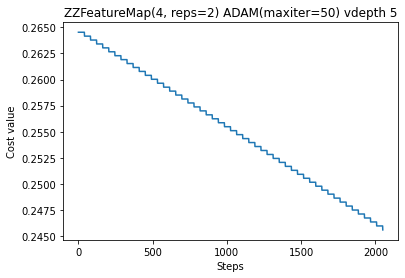

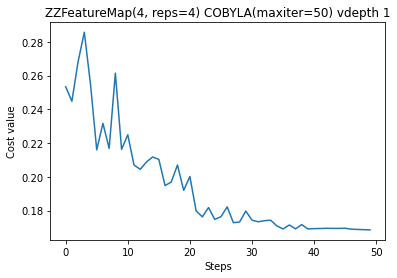

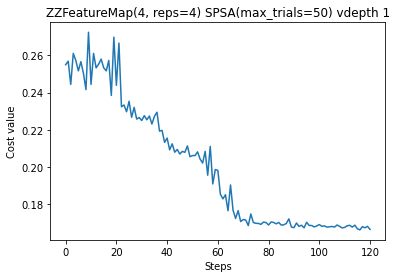

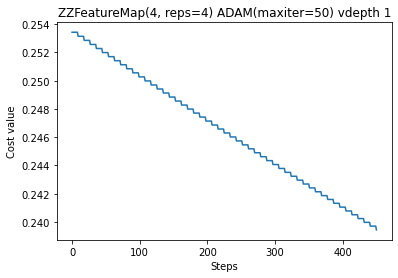

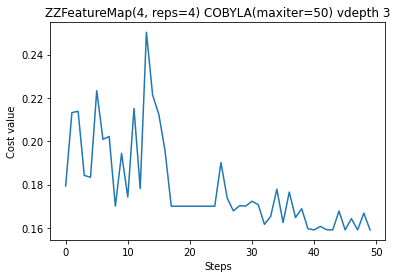

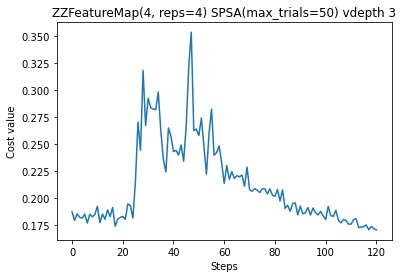

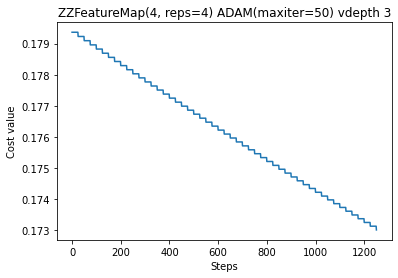

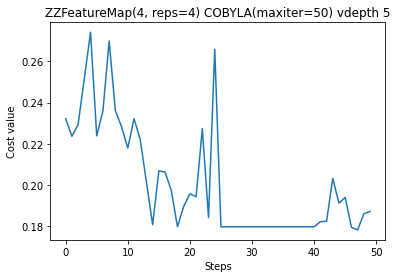

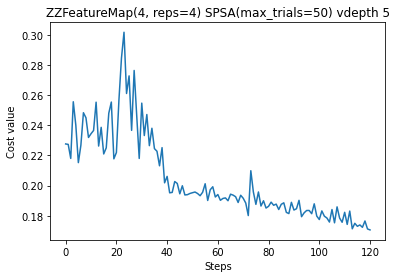

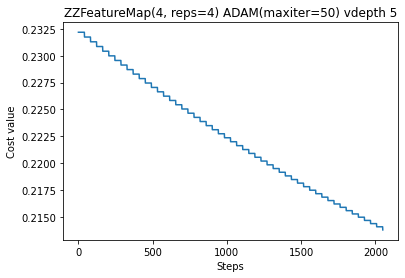

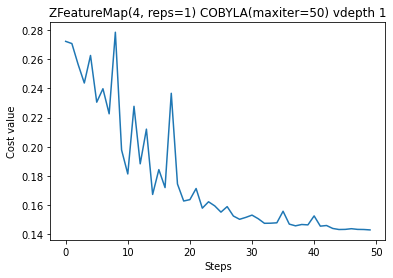

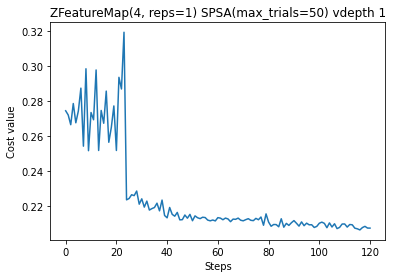

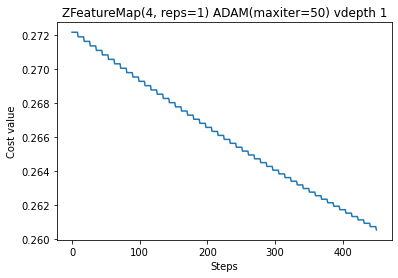

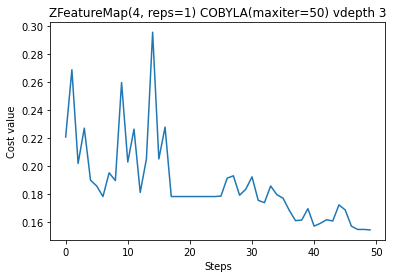

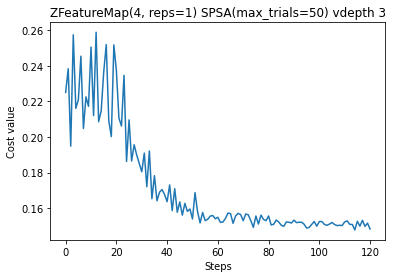

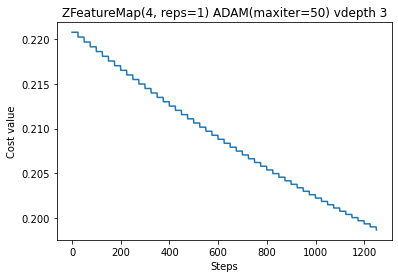

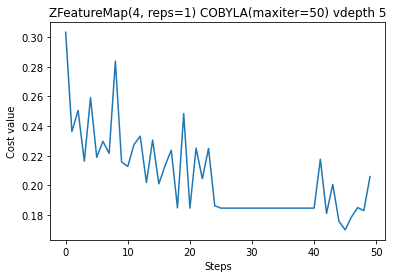

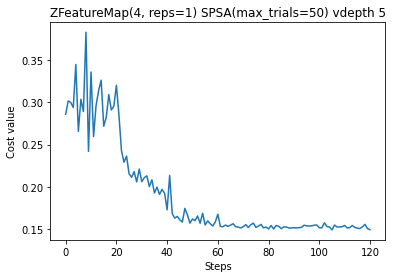

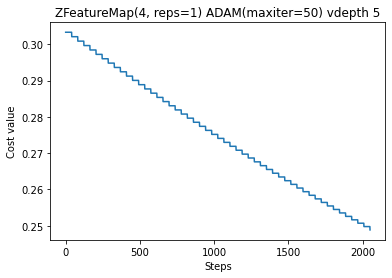

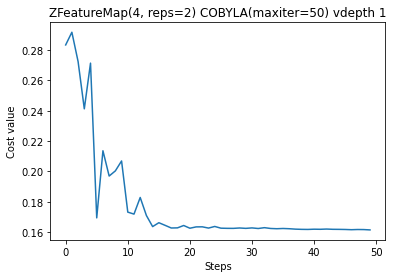

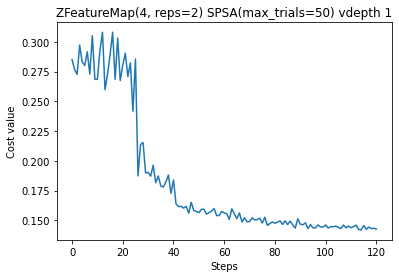

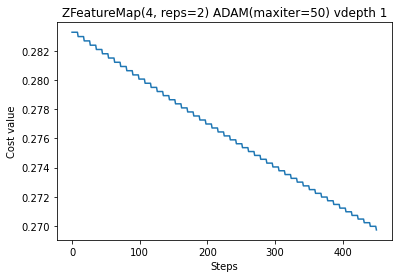

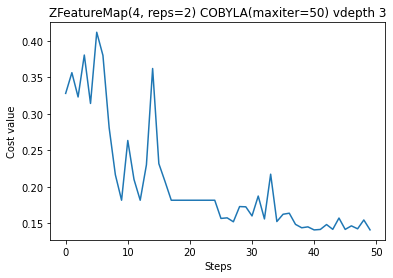

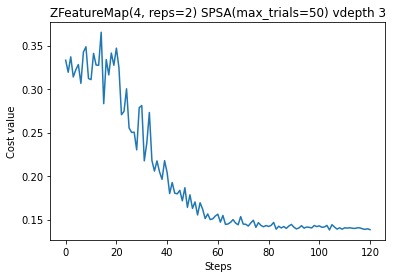

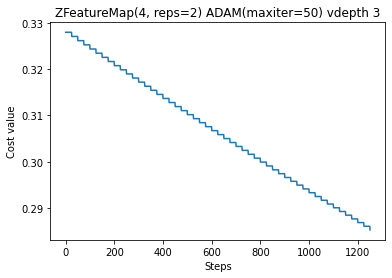

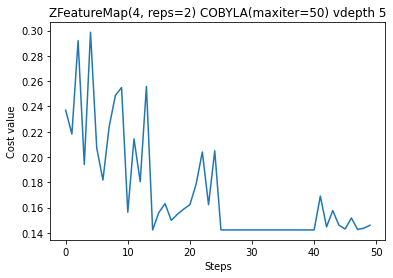

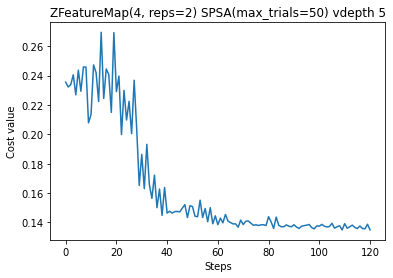

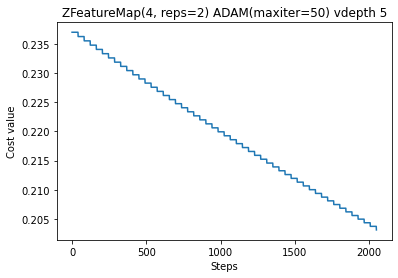

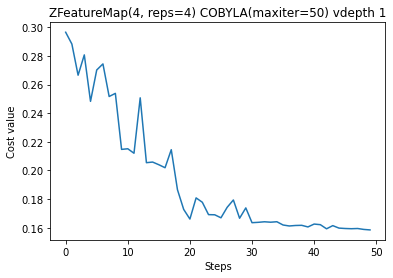

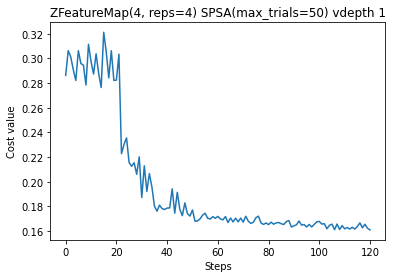

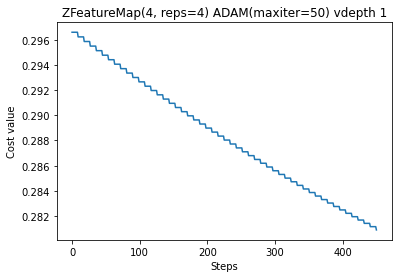

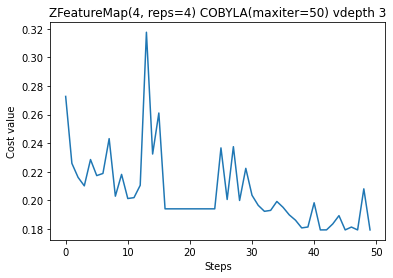

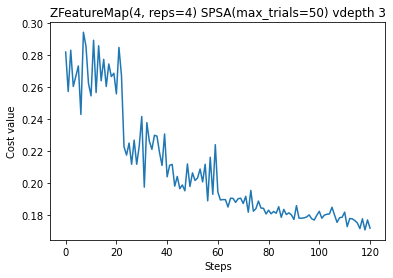

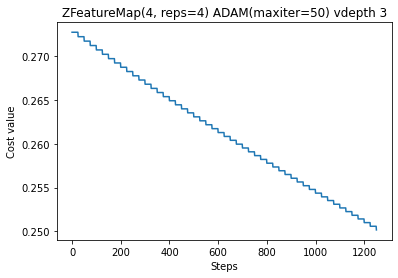

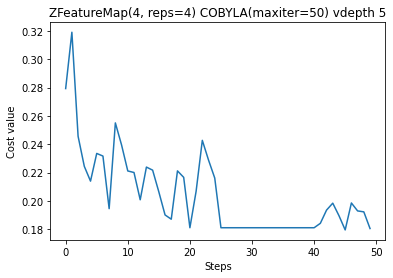

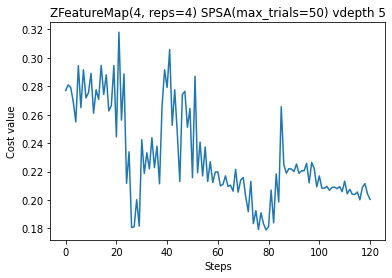

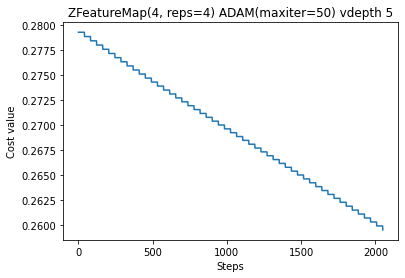

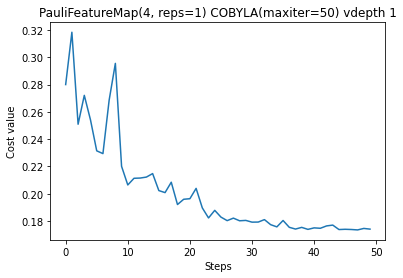

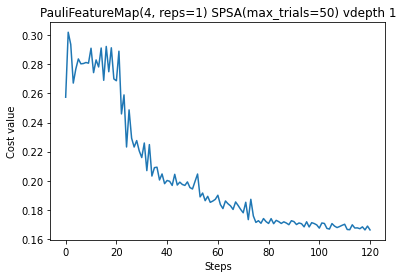

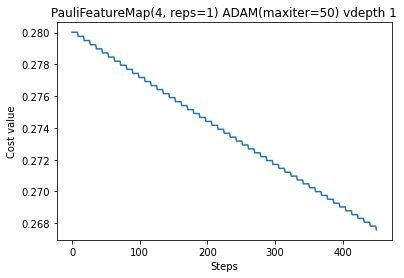

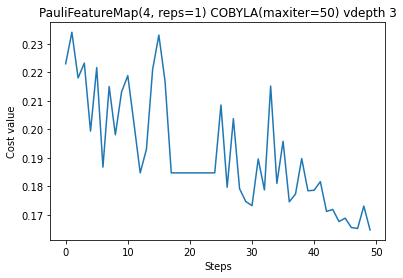

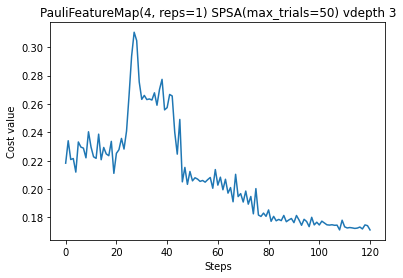

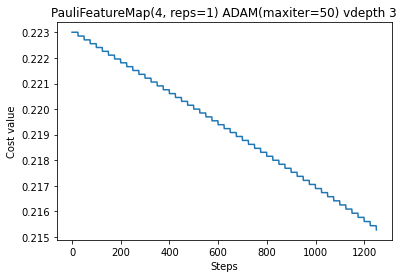

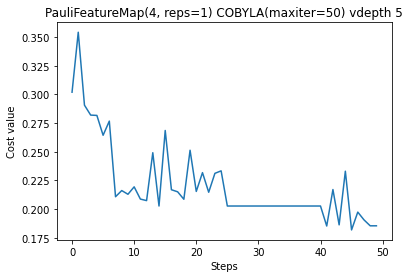

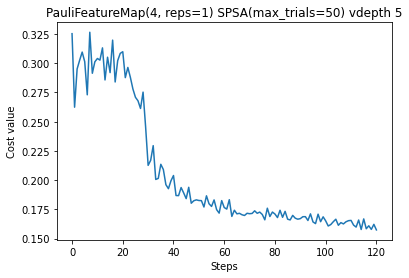

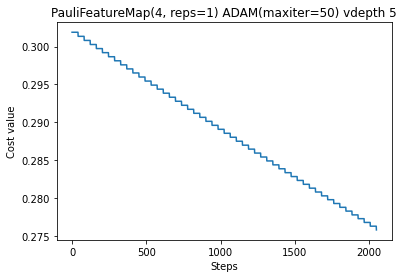

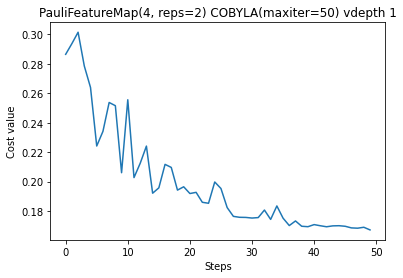

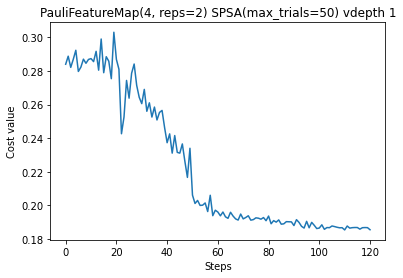

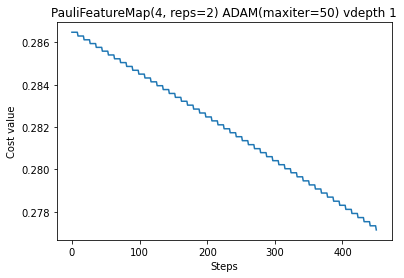

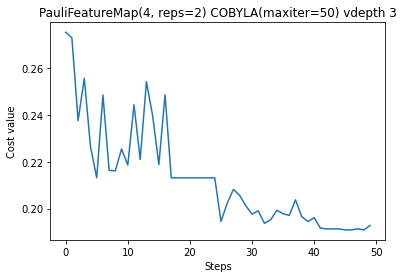

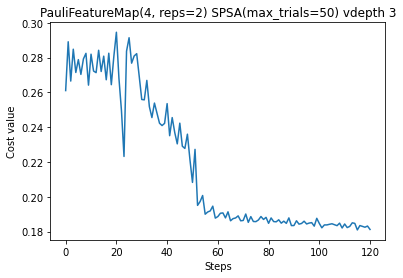

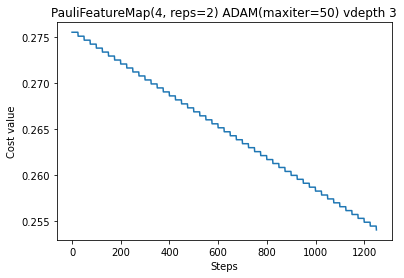

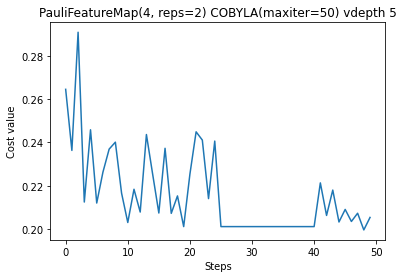

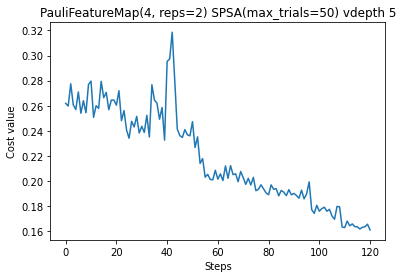

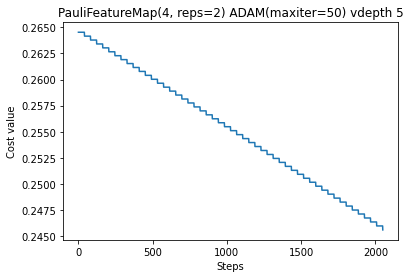

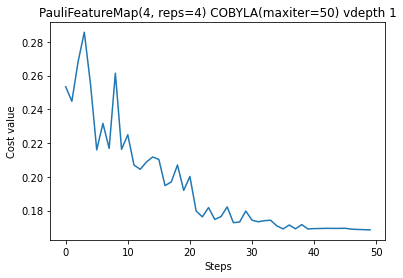

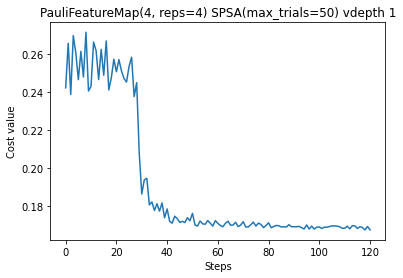

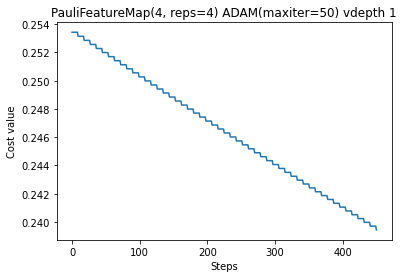

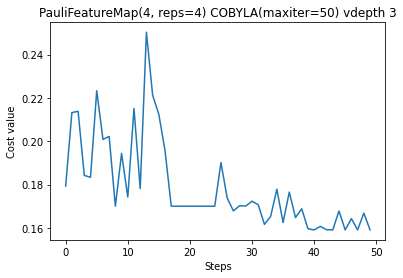

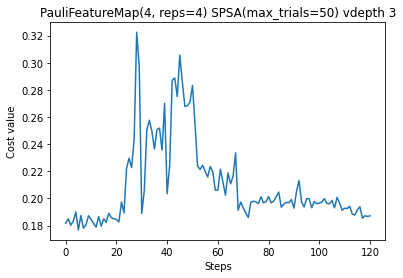

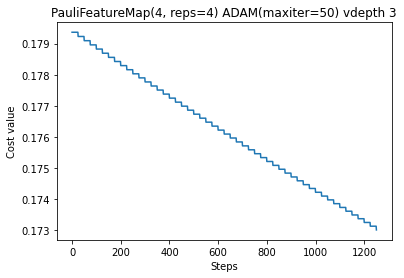

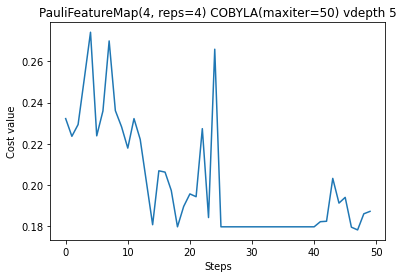

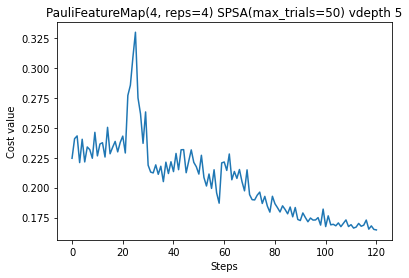

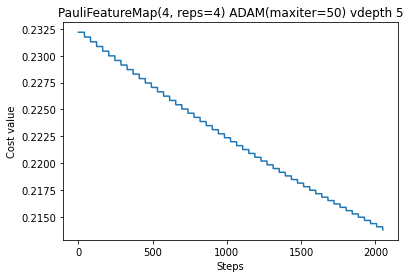

In [7]:
# Plotting all 
for i in range(df.shape[0]):
    fig = plt.figure()
    data = df['CostValues'][i].split(',')
    data = [float(x.replace("[", "").replace("]", "")) for x in data]
    plt.plot(range(0, len(data), 1), data)
    plt.xlabel('Steps')
    plt.ylabel('Cost value')
    plt.title(str(df['Spec'][i]))
    plt.show()
    path = '../../Output/Figures/{}.jpeg'.format(df['Spec'][i].replace("(", "").replace("FeatureMap", "").replace(")", "").replace(",", "").replace("=", "").replace(" ", "").replace("_", ""))
    # fig.savefig(path)

In [8]:
def plot_individual_optimizers(Optimizers):
    for opt in Optimizers:
        max_iter = 0
        fig = plt.figure(figsize=(20,20))
        for i in range(df.shape[0]):
            if df['Spec'][i].__contains__(opt):
                data = [float(x.replace("[", "").replace("]", "")) for x in df['CostValues'][i].split(',')]
                if len(data) >= max_iter:
                    max_iter = len(data)

        for i in range(df.shape[0]):
            if df['Spec'][i].__contains__(opt):
                data = df['CostValues'][i].split(',')
                data = [float(x.replace("[", "").replace("]", "")) for x in data]
                if max_iter >= len(data):
                    temp = np.full((max_iter, ), data[len(data) -1])
                    temp[:len(data)] = data
                    data = temp                    
                plt.plot(range(0, len(data), 1), data, label='{}'.format(df['Spec'][i].replace("(", "").replace("FeatureMap", "").replace(")", "").replace(",", "").replace("=", "").replace(" ", "").replace("_", "")))
        plt.xlabel('Steps')
        plt.ylabel('Cost value')
        plt.title(opt)
        plt.legend()
        plt.show()


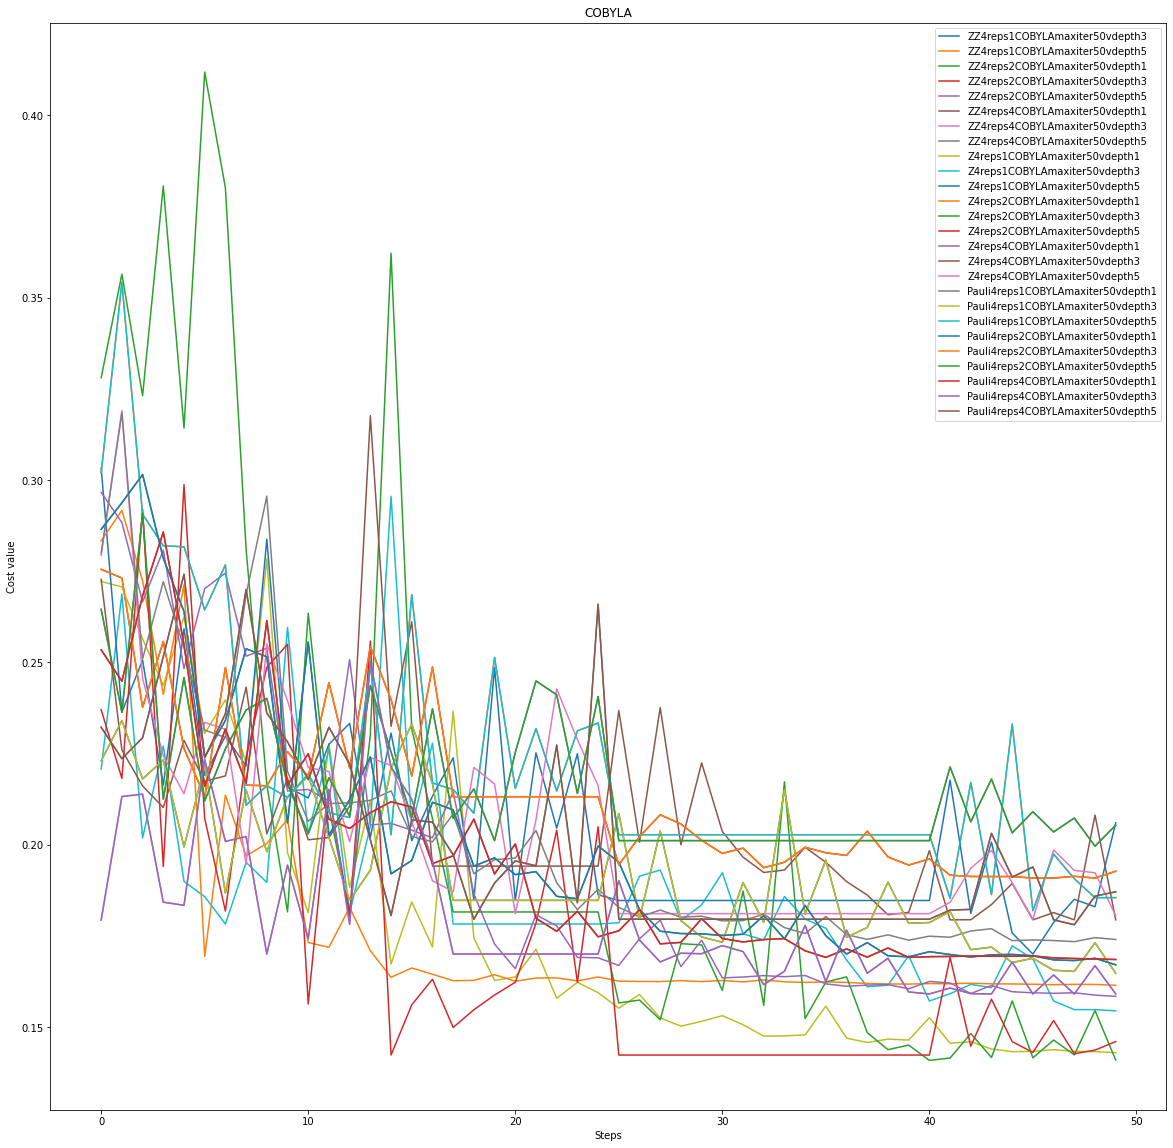

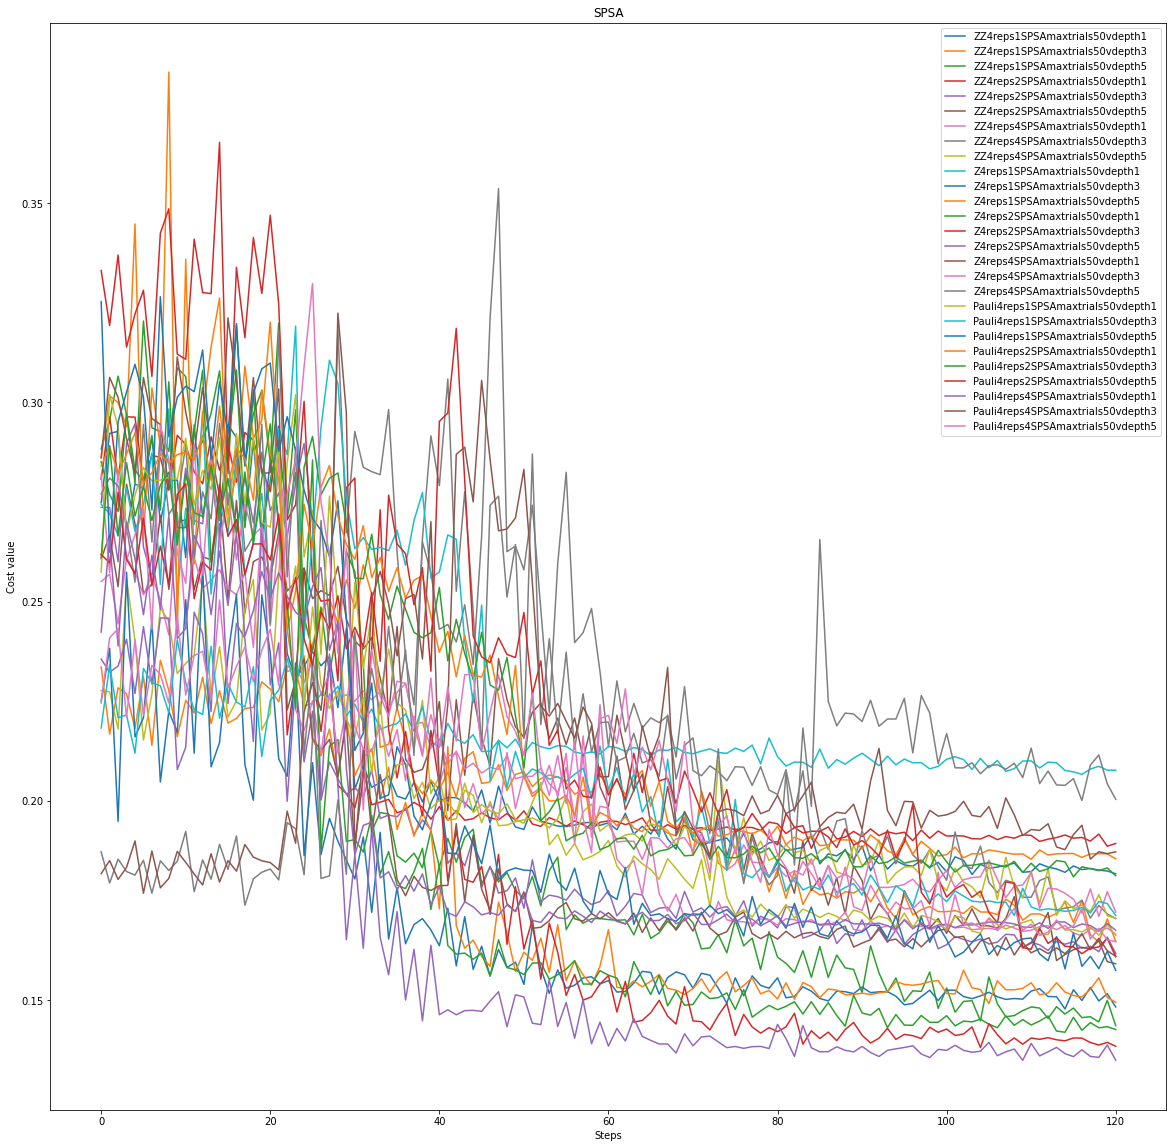

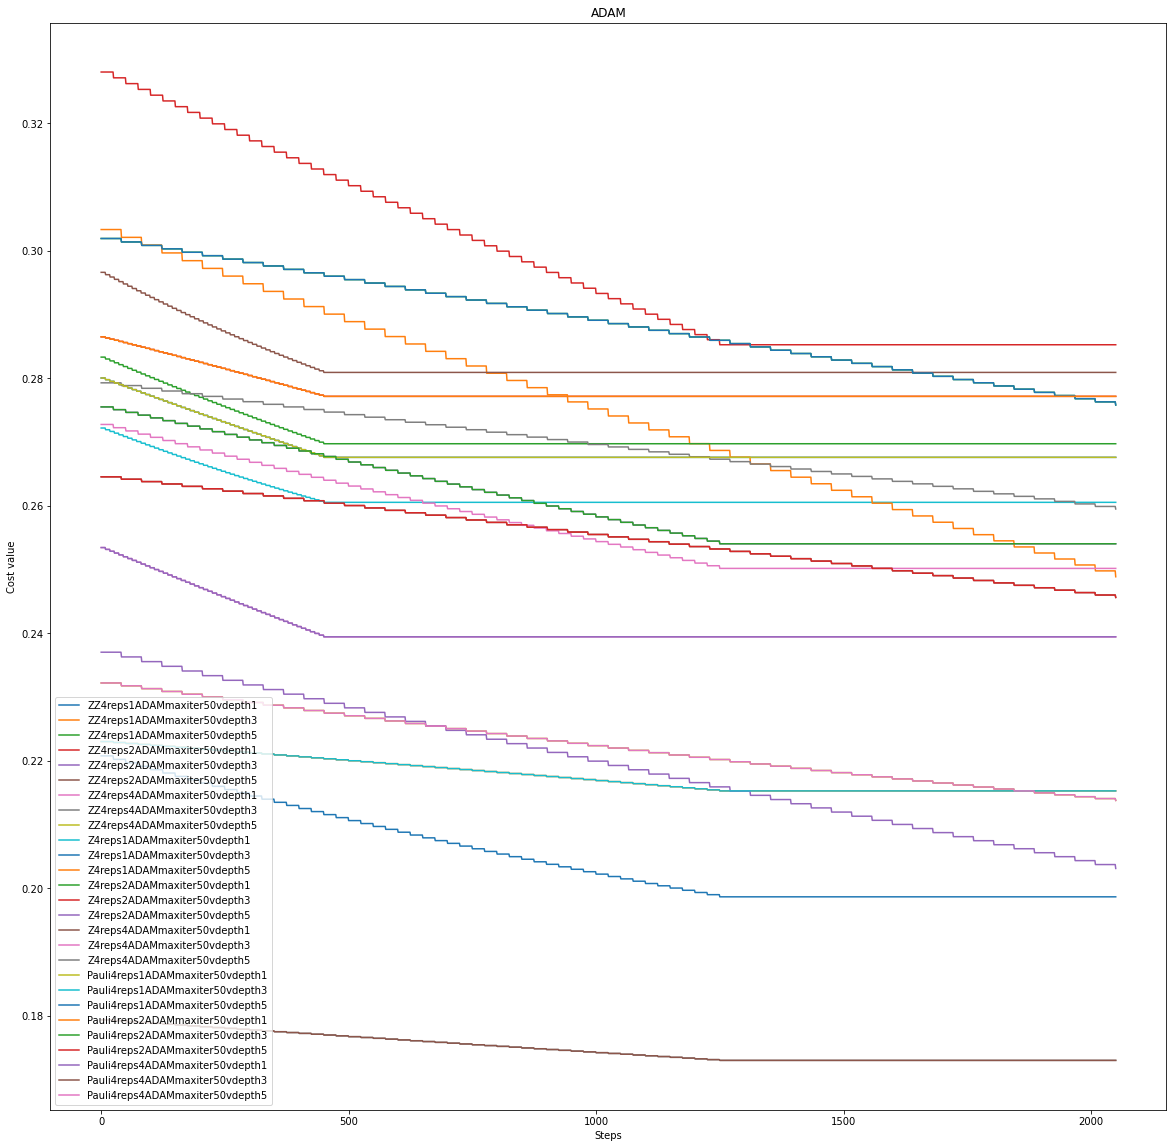

In [9]:
plot_individual_optimizers(["COBYLA", "SPSA", "ADAM"])